In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

In [49]:
# Output File (CSV)
#output_data_file = "output_data/california_fire_cleaned.csv"

##switch to using this file, which has dropped columns we aren't using

In [353]:
#load in file
#fire_data_file = "Resources/California_Fire_Incidents.csv"

#read and display csv with Pandas 
#fire_data_df = pd.read_csv("output_data/california_fire_cleaned.csv")
fire_data_df = pd.read_csv("Resources/california_fire_cleaned.csv")
fire_data_df.head()

,Counties,AcresBurned,AirTankers,ArchiveYear,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,...,AvgEngines,AvgFatalities,AvgHelicopters,AvgInjuries,AvgPersonnelInvolved,AvgStructuresDamaged,AvgStructuresDestroyed,AvgStructuresEvacuated,AvgStructuresThreatened,AvgWaterTenders
0,Alameda,240.0,NaN,2013.0,1,NaN,NaN,NaN,2013-06-08T13:25:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alameda,150.0,NaN,2013.0,1,NaN,NaN,NaN,2013-10-04T10:30:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alameda,50.0,NaN,2013.0,1,NaN,NaN,NaN,2013-07-04T11:30:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alameda,38.0,NaN,2013.0,1,NaN,NaN,NaN,2013-07-06T14:30:00Z,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alameda,2700.0,NaN,2015.0,1,NaN,NaN,5.0,2015-08-22T18:30:00Z,NaN,...,5.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,1.0


In [354]:
#list all of the columns in the table
fire_data_df.columns

Index(['Counties', 'AcresBurned', 'AirTankers', 'ArchiveYear', 'CountyIds',
       'CrewsInvolved', 'Dozers', 'Engines', 'Extinguished', 'Fatalities',
       'Featured', 'Final', 'Helicopters', 'Injuries', 'Latitude', 'Longitude',
       'MajorIncident', 'Name', 'PersonnelInvolved', 'Started',
       'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated',
       'StructuresThreatened', 'UniqueId', 'WaterTenders', 'Started Date',
       'Ended Date', 'Started Month', 'Days Burned', 'AvgAcresBurned',
       'AvgAirTankers', 'AvgCrewsInvolved', 'AvgDozers', 'AvgEngines',
       'AvgFatalities', 'AvgHelicopters', 'AvgInjuries',
       'AvgPersonnelInvolved', 'AvgStructuresDamaged',
       'AvgStructuresDestroyed', 'AvgStructuresEvacuated',
       'AvgStructuresThreatened', 'AvgWaterTenders'],
      dtype='object')

In [355]:
#use county count to include fires that might have affected multiple counties
county_count = fire_data_df["Counties"].value_counts()
county_count
county_df = pd.DataFrame(county_count)
county_df


,Counties
Riverside,146
San Diego,89
Butte,66
San Luis Obispo,64
Shasta,64
Kern,62
Fresno,57
Siskiyou,57
San Bernardino,53
Tehama,51


In [356]:
#list unique counties
county_names = fire_data_df["Counties"].unique()
county_names

array(['Alameda', 'Alpine', 'Amador', 'Contra Costa', 'Fresno',
       'Humboldt', 'Lake', 'Los Angeles', 'Merced', 'Nevada', 'San Mateo',
       'Santa Clara', 'Yuba', 'Mendocino', 'Mono', 'Napa', 'Orange',
       'San Benito', 'San Diego', 'San Luis Obispo', 'Santa Barbara',
       'Sonoma', 'Sutter', 'Tulare', 'Yolo', 'Madera', 'Calaveras',
       'Mariposa', 'Solano', 'Plumas', 'Siskiyou', 'Inyo', 'Monterey',
       'Stanislaus', 'Sierra', 'Shasta', 'Colusa', 'Marin', 'San Joaquin',
       'Kings', 'Lassen', 'San Francisco', 'Glenn', 'Imperial', 'Placer',
       'Tuolumne', 'Ventura', 'Tehama', 'Modoc', 'Santa Cruz', 'Trinity',
       'Kern', 'San Bernardino', 'El Dorado', 'Sacramento', 'Butte',
       'Del Norte', 'Riverside'], dtype=object)

In [357]:
#find top ten counties for total fire count
top_ten_counties = county_df.head(10)
top_ten_counties

,Counties
Riverside,146
San Diego,89
Butte,66
San Luis Obispo,64
Shasta,64
Kern,62
Fresno,57
Siskiyou,57
San Bernardino,53
Tehama,51


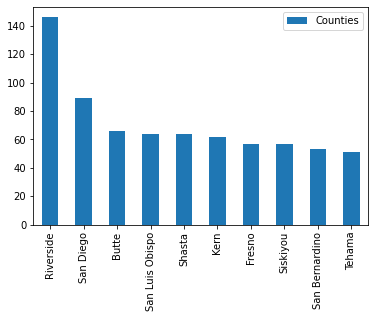

In [358]:
top_ten_counties.plot(kind="bar")
plt.show()

In [111]:
#bar chart for showing top ten counties for total fire count
# x_axis = np.arange(len(top_ten_counties))
# plt.bar(x_axis, top_ten_counties["Counties"])
# plt.xticks(top_ten_counties["index"], rotation="vertical")

In [359]:
#find last ten counties for total fire incidents
last_ten_counties = county_df.tail(10)
last_ten_counties

,Counties
Colusa,6
Marin,6
Kings,5
Santa Cruz,4
San Mateo,3
Sutter,3
Sierra,2
Alpine,2
Imperial,1
San Francisco,1


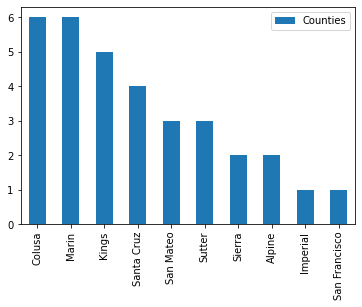

In [360]:
last_ten_counties.plot(kind="bar")
plt.show()

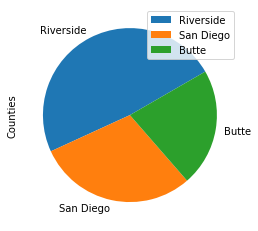

In [361]:
#pie chart to show top three fire count counties 
top_three_counties = county_df.head(3)
top_three_counties

total_county_pie = top_three_counties.plot(kind="pie", subplots=True, startangle=30)

plt.show()

In [362]:
#find count of fires deemed a major incident in each county, using "MajorIncident" column
#get rid of counties with no major incidents
major_df = fire_data_df.loc[fire_data_df["MajorIncident"]==True]
major_df

#using new parameter to find major fires, as defined by Cal Fire: Acres burned > 10
#major_df = fire_data_df.loc[fire_data_df["AcresBurned"]>=10]
#major_df
#len(major_df)

county_major_df = major_df.groupby(["Counties"])["UniqueId"].count().reset_index().sort_values(by= "UniqueId", ascending= False)
county_major_df

#add in county_count to compare total fires vs. major incidents

# major_all_df = pd.DataFrame({"Counties" : county_names, 
#                "Total Fires" : county_count, 
#                "Major Fires" : major_incident_count})
# major_all_df

,Counties,UniqueId
2,Butte,28
32,San Diego,27
38,Shasta,26
13,Lake,21
28,Riverside,18
24,Napa,16
6,El Dorado,15
18,Mariposa,14
7,Fresno,12
31,San Bernardino,11


In [151]:
#chart top five counties with 12 or more major fires
#major_incident_count.loc[(major_incident_count["MajorIncident"]>=12), ["Counties", "MajorIncident"]]

In [363]:
#find top ten counties with major incidents from county_major_df

top_ten_major = county_major_df.head(10)
top_ten_major

,Counties,UniqueId
2,Butte,28
32,San Diego,27
38,Shasta,26
13,Lake,21
28,Riverside,18
24,Napa,16
6,El Dorado,15
18,Mariposa,14
7,Fresno,12
31,San Bernardino,11


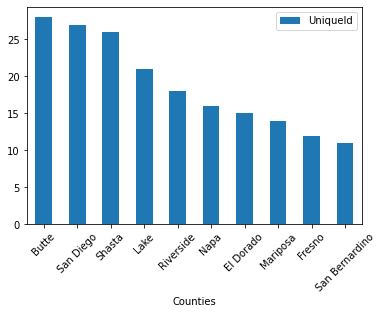

In [364]:
top_ten_major.plot(kind="bar", x="Counties", rot=45)
plt.show()

In [365]:
#find bottom ten counties with major incidents from county_major_df
last_ten_major = county_major_df.tail(10)
last_ten_major

,Counties,UniqueId
36,Santa Clara,2
37,Santa Cruz,2
0,Alameda,2
34,San Mateo,1
29,Sacramento,1
26,Orange,1
22,Mono,1
20,Merced,1
17,Marin,1
12,Kings,1


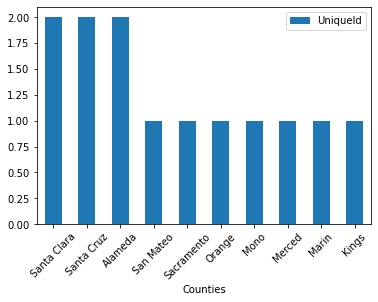

In [366]:
last_ten_major.plot(kind="bar", x="Counties", rot=45)
plt.show()

In [368]:
#find acreage of burned area 
#sum by UniqueID to get unique fires (some fires by county are duplicates)

major_df

#list of county names
county_names = major_df["Counties"].unique()
county_names

#count unique fires with UniqueID
maj_fire_count = major_df.groupby(["Counties"])["UniqueId"].nunique()
maj_fire_count


#find burned acreage with "AvgAcresBurned"
burned_acreage = major_df.groupby(["Counties"])["AvgAcresBurned"].sum()
burned_acreage

#create a new dataframe
acres_burned_df = pd.DataFrame({"Major Fire Count": maj_fire_count, 
                                "Acres Burned": round(burned_acreage,2)})

acres_burned_df

#sort by acres burned from high to low
acres_burned_sorted = acres_burned_df.sort_values(by= "Acres Burned", ascending= False)
acres_burned_sorted

,Major Fire Count,Acres Burned
Counties,,
Ventura,7,230375.00
Lake,21,225975.42
Shasta,26,222486.50
Butte,28,182871.00
Mendocino,10,169672.42
Santa Barbara,5,149165.50
Sonoma,11,148948.50
Monterey,6,137538.00
Napa,16,135812.50


In [369]:
#display top ten counties in terms of acres burned
top_ten_acreage = acres_burned_sorted.head(10)
top_ten_acreage

,Major Fire Count,Acres Burned
Counties,,
Ventura,7,230375.00
Lake,21,225975.42
Shasta,26,222486.50
Butte,28,182871.00
Mendocino,10,169672.42
Santa Barbara,5,149165.50
Sonoma,11,148948.50
Monterey,6,137538.00
Napa,16,135812.50


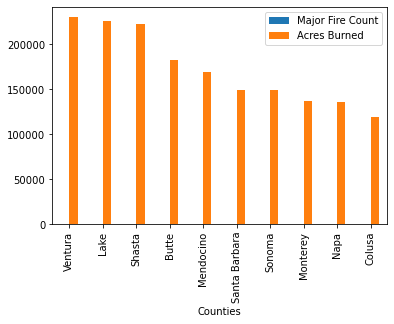

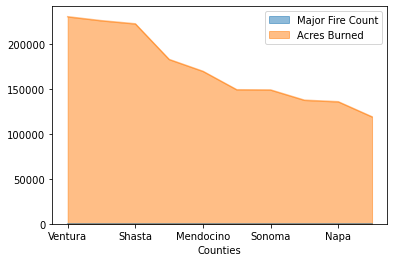

In [371]:
#use different chart? different variables to show the difference?
top_ten_acreage.plot(kind="bar", stacked=False)
plt.show()

#use area plot? df.plot.area(stacked=False)
#just practicing--will bring this style in to compare other variables

top_ten_acreage.plot.area(stacked=False)

In [372]:
#display last ten counties in terms of acres burned
last_ten_acreage = acres_burned_sorted.tail(10)
last_ten_acreage

,Major Fire Count,Acres Burned
Counties,,
Alameda,2,3340.0
Lassen,3,2784.0
San Benito,4,2734.0
Tuolumne,6,2330.0
Merced,1,1333.0
Calaveras,10,1221.0
Santa Cruz,2,408.0
Marin,1,152.0
Sacramento,1,110.0


In [378]:
#find number of injuries and fatalities by county 

major_df

#list of county names
county_names = major_df["Counties"].unique()
county_names

#count unique fires with UniqueID
maj_fire_count = major_df.groupby(["Counties"])["UniqueId"].nunique()
maj_fire_count

#count injuries with "AvgInjuries"
injury_count = major_df.groupby(["Counties"])["AvgInjuries"].sum()
injury_count

#count fatalities with "AvgFatalities"
fatality_count = major_df.groupby(["Counties"])["AvgFatalities"].sum()
fatality_count

#create a new dataframe
human_toll_df = pd.DataFrame({"Major Fire Count": maj_fire_count, 
                              "Injuries": injury_count,
                              "Fatalities": fatality_count})

human_toll_df

#sort by fatalities
human_toll_fatalities_sorted = human_toll_df.sort_values(by= ["Major Fire Count","Fatalities"], ascending= False)

human_toll_visual = human_toll_fatalities_sorted.head(5)
human_toll_visual

,Major Fire Count,Injuries,Fatalities
Counties,,,
Butte,28,21.00,85.00
San Diego,27,39.00,0.00
Shasta,26,55.00,1.50
Lake,21,3.75,0.25
Riverside,18,33.00,2.00


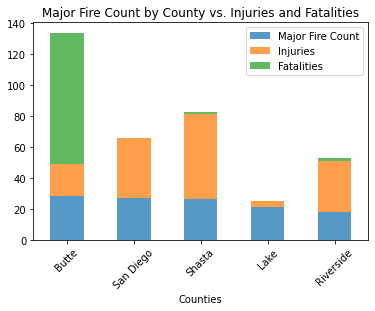

In [379]:
#bar chart to visualize the injuries and fatalities vs. major fire counts by county
human_toll_visual.plot(kind="bar", stacked=True, rot=45, alpha=0.75)
plt.title("Major Fire Count by County vs. Injuries and Fatalities")
plt.xlabel("Counties")
plt.savefig("Images/Bar_Chart_County_Fire_Count_Injuries_Fatalities")
plt.show()

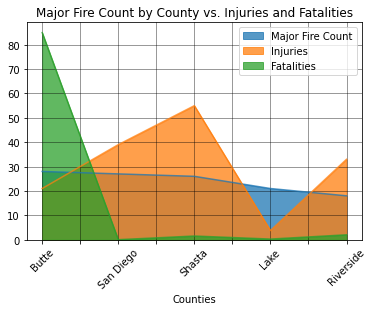

In [380]:
#area chart to visualize injuries and fatalities vs. major fire counts by county
human_toll_visual.plot.area(stacked=False, rot=45, alpha=0.75)
plt.title("Major Fire Count by County vs. Injuries and Fatalities")
plt.xlabel("Counties")
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)
plt.savefig("Images/Area_Chart_County_Fire_Count_Injuries_Fatalities")
plt.show()

In [400]:
#find number of resources involved per county

major_df

#list of county names
county_names = major_df["Counties"].unique()
county_names

#count unique fires with UniqueID
maj_fire_count = major_df.groupby(["Counties"])["UniqueId"].nunique()
maj_fire_count

#count days burned with Days Burned--need to use Average Column
days_burned = major_df.groupby(["Counties"])["Days Burned"].sum()
days_burned

#count 'Helicopters' involved--need to use average column
helicopter_count = major_df.groupby(["Counties"])["AvgHelicopters"].sum()
helicopter_count

#count dozers involved--need to use average column
dozer_count = major_df.groupby(["Counties"])["AvgDozers"].sum()
dozer_count

#count engines involved--need to use average column 
engine_count = major_df.groupby(["Counties"])["AvgEngines"].sum()
engine_count

#count water tankers involved: WaterTenders--need to use average column 
water_tender_count = major_df.groupby(["Counties"])["AvgWaterTenders"].sum()
water_tender_count

#count personnel involved: PersonnelInvolved--need to use average column 
personnel_count = major_df.groupby(["Counties"])["AvgPersonnelInvolved"].sum()
personnel_count

#count crews involved: CrewsInvolved--need to use average column 
crew_count = major_df.groupby(["Counties"])["AvgCrewsInvolved"].sum()
crew_count

#total equipment involved, found with average columns
total_equipment = helicopter_count + dozer_count + engine_count + water_tender_count 
total_equipment 

#create a new dataframe 
resources_df = pd.DataFrame({"Major Fire Count": maj_fire_count, 
                            "Days Burned": days_burned,
                            "Helicopters": helicopter_count,
                            "Dozers": dozer_count, 
                            "Engines": engine_count, 
                            "Water Tenders": water_tender_count, 
                            "Personnel Involved": personnel_count,
                            "Crews Involved": crew_count, 
                            "Total Equipment": total_equipment})

resources_df

resources_df_sorted = resources_df.sort_values(by= ["Major Fire Count","Total Equipment"], ascending= False)
resources_df_sorted.head(5)                                               

,Major Fire Count,Days Burned,Helicopters,Dozers,Engines,Water Tenders,Personnel Involved,Crews Involved,Total Equipment
Counties,,,,,,,,,
Butte,28,1597.0,32.000000,75.000000,395.000000,88.000000,6071.000000,135.000000,590.000000
San Diego,27,1671.0,72.000000,83.000000,399.000000,101.000000,7278.000000,193.000000,655.000000
Shasta,26,1782.0,28.000000,54.000000,197.500000,79.500000,2540.000000,100.500000,359.000000
Lake,21,1258.0,9.666667,58.333333,198.333333,52.333333,2266.333333,57.333333,318.666667
Riverside,18,882.0,31.000000,37.000000,416.000000,38.000000,3750.000000,138.000000,522.000000


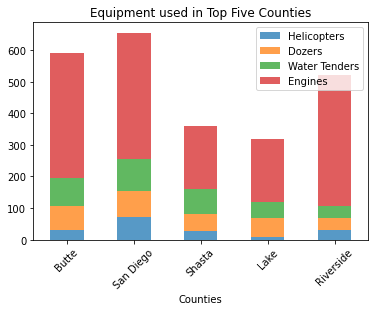

In [403]:
#graph the resources used by county
equipment_county_df = resources_df_sorted.head(5)[["Helicopters","Dozers","Water Tenders","Engines"]]
equipment_county_df.plot(kind="bar", stacked=True, rot=45, alpha=0.75)
plt.title("Equipment used in Top Five Counties")
plt.xlabel("Counties")
plt.savefig("Images/Bar_Chart_Equipment_Top_Five_Counties")
plt.show()

In [383]:
#find average of resources used per unique ID--need to use average column 
avg_resources_used = total_equipment / maj_fire_count
avg_resources_used

#find average number of fatalities per unique ID--need to use average column 
avg_fatalities = fatality_count / maj_fire_count
avg_fatalities

Counties
Alameda            0.000000
Amador             0.000000
Butte              3.035714
Calaveras          0.000000
Colusa             0.041667
Contra Costa       0.000000
El Dorado          0.000000
Fresno             0.000000
Glenn              0.083333
Humboldt           0.000000
Inyo               0.000000
Kern               0.000000
Kings              0.000000
Lake               0.011905
Lassen             0.000000
Los Angeles        0.416667
Madera             0.000000
Marin              0.000000
Mariposa           0.000000
Mendocino          0.925000
Merced             0.000000
Modoc              0.000000
Mono               0.000000
Monterey           0.166667
Napa               0.968750
Nevada             0.000000
Orange             0.000000
Placer             0.000000
Riverside          0.111111
Sacramento         0.000000
San Benito         0.000000
San Bernardino     0.000000
San Diego          0.000000
San Luis Obispo    0.000000
San Mateo          0.000000
Santa Barba

The correlation between the use of equipment and the acres burned is 0.49
The r-squared is: 0.47


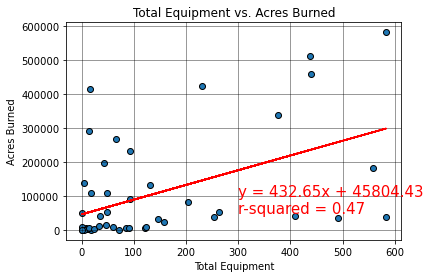

In [339]:
#compare county count of acres burned with use of resources
# plt.scatter(resources_df["Total Equipment"], acres_burned_df["Acres Burned"], marker="o", edgecolor="black")
# plt.title("Total Equipment vs. Acres Burned")
# plt.xlabel("Total Equipment")
# plt.ylabel("Acres Burned")
# plt.rc('grid', linestyle="-", color='black')
# plt.grid(True, alpha=0.5)
# plt.savefig("Total_Equipment_VS_Acres_Burned.png")
# plt.show()

#compare county count of acres burned with use of resources and draw regression line

#calculate correlation
acres_resources_corr = round(st.pearsonr(total_equipment, burned_acreage)[0],2)
print(f"The correlation between the use of equipment and the acres burned is {acres_resources_corr}")

#linear regression values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# regress_values = total_equipment * slope + intercept

#find linear regression values
(equip_r_slope, equip_r_intercept, equip_r_rvalue, equip_r_pvalue, equip_r_stderr) = st.linregress(total_equipment, burned_acreage)
regress_values = total_equipment * equip_r_slope + equip_r_intercept

#calculate r-squared 
acres_resources_rsquared = round(rvalue**2,2)
print(f"The r-squared is: {acres_resources_rsquared}")

#line equation y = mx + b
equip_r_line_eq = "y = " + str(round(equip_r_slope,2)) + "x + " + str(round(equip_r_intercept,2))

#generate scatter plot 
plt.scatter(total_equipment, burned_acreage, marker="o", edgecolor="black")
plt.plot(total_equipment, regress_values, "r-")

#annotate graph
plt.annotate(equip_r_line_eq,(300,100000),fontsize=15,color="red")
plt.annotate(f"r-squared = {acres_resources_rsquared}",(300,50000),fontsize=15,color="red")

#add title and labels
plt.title("Total Equipment vs. Acres Burned")
plt.xlabel("Total Equipment")
plt.ylabel("Acres Burned")

#add gridlines
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)

#save as png to Images 
plt.savefig("Images/Total_Equipment_VS_Acres_Burned.png")
plt.show()

The correlation between the number of fatalities and the total equipment used is 0.33
The r-squared is: 0.11


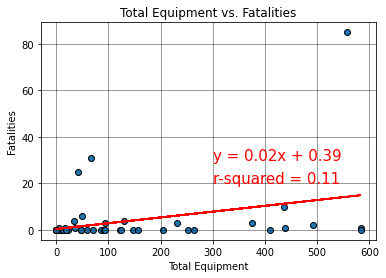

In [352]:
#compare equipment used with fatalities
# plt.scatter(resources_df["Total Equipment"], human_toll_df["Fatalities"], marker="o", edgecolor="black")
# plt.title("Total Equipment vs. Fatalities")
# plt.xlabel("Total Equipment")
# plt.ylabel("Fatalities")
# plt.rc('grid', linestyle="-", color='black')
# plt.grid(True, alpha=0.5)
# plt.savefig("Total_Equipment_VS_Fatalities.png")
# plt.show()

#compare equipment used with fatalities and find correlation and linear regression
equip_fatal_correlation = round(st.pearsonr(total_equipment, fatality_count)[0],2)
print(f"The correlation between the number of fatalities and the total equipment used is {equip_fatal_correlation}")

#find linear regression values
(equip_fatal_slope, equip_fatal_intercept, equip_fatal_rvalue, equip_fatal_pvalue, equip_fatal_stderr) = st.linregress(total_equipment, fatality_count)
equip_fatal_regress_values = total_equipment * equip_fatal_slope + equip_fatal_intercept

#calculate r-squared 
equip_fatal_r_squared = round(equip_fatal_rvalue**2,2)
print(f"The r-squared is: {equip_fatal_r_squared}")

#y = mx + b
equip_fatal_line_eq = "y = " + str(round(equip_fatal_slope,2)) + "x + " + str(round(equip_fatal_intercept,2))

#generate scatter plot
plt.scatter(total_equipment, fatality_count, marker="o", edgecolor="black")
plt.plot(total_equipment, equip_fatal_regress_values, "r-")

#add annotation to graph 
plt.annotate(equip_fatal_line_eq,(300,30),fontsize=15,color="red")
plt.annotate(f"r-squared = {equip_fatal_r_squared}", (300,20), fontsize=15, color="red")

#add title and x, y labels
plt.title("Total Equipment vs. Fatalities")
plt.xlabel("Total Equipment")
plt.ylabel("Fatalities")

#add gridlines
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)

#save to Images folder
plt.savefig("Images/Total_Equipment_VS_Fatalities.png")
plt.show()

In [399]:
#compare equipment used with injuries and find linear regression  correlation number and r-squared

equip_injuries_correlation = round(st.pearsonr(total_equipment, injury_count)[0],2)
print(f"The correlation between the number of fatalities and the total equipment used is {equip_injuries_correlation}"
      
#find linear regression values
(equip_injury_slope, equip_injury_intercept, equip_injury_rvalue, equip_injury_pvalue, equip_injury_stderr) = st.linregress(total_equipment, injury_count)
equip_injury_regress_values = total_equipment * equip_injury_slope + equip_injury_intercept
          
#calculate r-squared 
equip_injury_rsquared = round(equip_injury_rvalue**2,2)
print(f"The r-squared is: {equip_injury_r_squared}")

#y = mx + b
equip_injury_line_eq = "y = " + str(round(equip_injury_slope,2)) + "x + " + str(round(equip_injury_intercept,2))

#generate scatter plot with linear regression line, equation of line, r-squared value      
plt.scatter(total_equipment, injury_count, marker="o", edgecolor="black")
plt.plot(total_equipment, equip_injury_regress_values, "r-")
      
#plot annotation      
plt.annotate(line_eq,(300,10),fontsize=15,color="red")
plt.annotate(f"r-squared = {equip_injury_r_squared}", (300,20), fontsize=15, color="red")      

#add title and x,y labels      
plt.title("Total Equipment vs. Injuries")
plt.xlabel("Total Equipment")
plt.ylabel("Injuries")
      
#add gridlines
plt.rc('grid', linestyle="-", color='black')
plt.grid(True, alpha=0.5)

#save to Images folder      
plt.savefig("Images/Total_Equipment_VS_Injuries.png")
plt.show()

SyntaxError: invalid syntax (<ipython-input-399-2a6bddd40112>, line 8)

The r-squared is: 0.43788634488213646


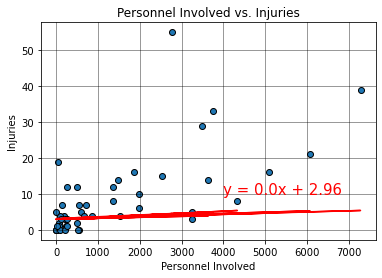

In [343]:
#compare personnel involved with injuries
# plt.scatter(resources_df["Personnel Involved"], human_toll_df["Injuries"], marker="o", edgecolor="black")
# plt.title("Personnel Involved vs. Injuries")
# plt.xlabel("Personnel Involved")
# plt.ylabel("Injuries")
# plt.rc('grid', linestyle="-", color='black')
# plt.grid(True, alpha=0.5)
# plt.savefig("Personnel_Involved_VS_Injuries.png")
# plt.show()

##incomplete
#compare personnel involved with injuries and find linear regression, r-squared and show line equation
#calculate the correlation
#personnel_correlaton = round(st.pearsonr(personnel_count, injury_counts)[0],2)

# (slope, intercept, rvalue, pvalue, stderr) = linregress(personnel_count, injury_count)
# regress_values = total_equipment * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(personnel_count, injury_count, marker="o", edgecolor="black")
# plt.plot(personnel_count, regress_values, "r-")
# plt.annotate(line_eq,(4000,10),fontsize=15,color="red")
# plt.title("Personnel Involved vs. Injuries")
# plt.xlabel("Personnel Involved")
# plt.ylabel("Injuries")
# plt.rc('grid', linestyle="-", color='black')
# plt.grid(True, alpha=0.5)
# print(f"The r-squared is: {rvalue**2}")
# plt.savefig("Personnel_Involved_VS_Injuries.png")
# plt.show()

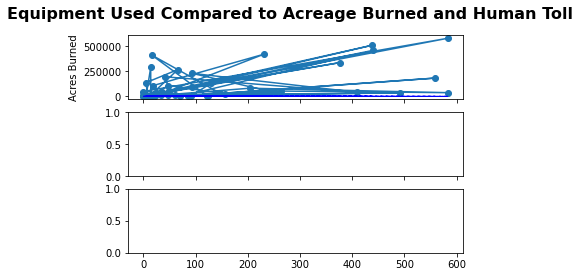

In [302]:
#generate a facet plot of all 3 figures
# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
# fig.suptitle("Equipment Used Compared to Acreage Burned and Human Toll", fontsize=16, fontweight="bold")

# #(slope, intercept, rvalue, pvalue, stderr) = linregress(total_equipment, burned_acreage)
# #regress_values = total_equipment * slope + intercept
# ax1.plot(total_equipment, burned_acreage, marker="o")
# ax1.plot(total_equipment, regress_values, "b--", linewidth=1)
# ax1.set_ylabel("Acres Burned")
# plt.show()
# plt.scatter(total_equipment, burned_acreage, marker="o", edgecolor="black")
# plt.plot(total_equipment, regress_values, "r-")

#brought in example to compare
# fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
# fig.suptitle("Crime Rates Over Time", fontsize=16, fontweight="bold")

# ax1.set_xlim(min(year), max(year))
# ax1.plot(year, violent_crime_rate, linewidth=1, marker="o")
# ax1.plot(year, vc_fit, "b--", linewidth=1)
# ax1.set_ylabel("Violent Crime Rate")

# ax2.plot(year, murder_rate, linewidth=1, marker="o", color="r")
# ax2.plot(year, m_fit, "r--", linewidth=1)
# ax2.set_ylabel("Murder Rate")

# ax3.plot(year, aggravated_assault_rate, linewidth=1, marker="o", color="g")
# ax3.plot(year, aa_fit, "g--", linewidth=1)
# ax3.set_ylabel("Aggravated Assault Rate")
# ax3.set_xlabel("Year")

# plt.show()